# Нефть-brent


In [77]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


C:\Users\stwer1998\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [78]:
data = pd.read_excel('нефть-brent 2010-2019.xlsx',index_col=0,parse_dates=["Date"],dayfirst=True)
data.head(5)

,Value
Date,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


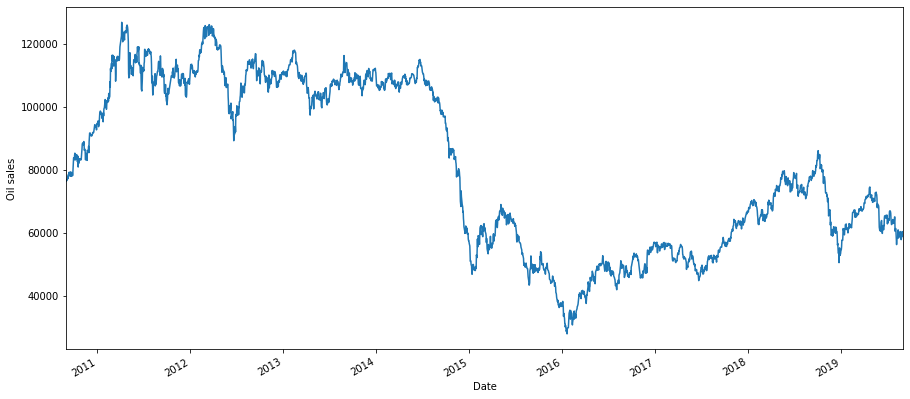

In [84]:
data.Value=data.Value*1000
plt.figure(figsize(15,7))
data.Value.plot()
plt.ylabel('Oil sales')
pylab.show()

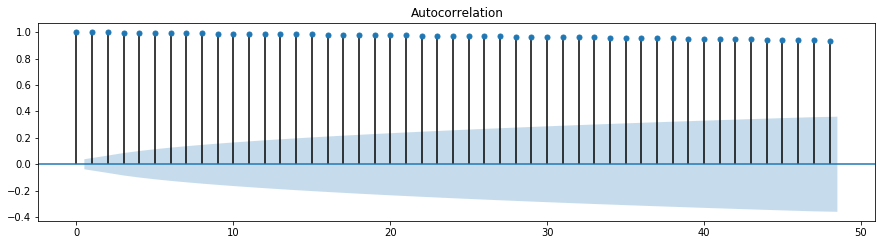

In [85]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data.Value[13:].values.squeeze(), lags=48, ax=ax)
pylab.show()

Оптимальный параметр преобразования Кокса- Бокса: 0.673894
 Критерий Дики-Фуллера: p=0.640408


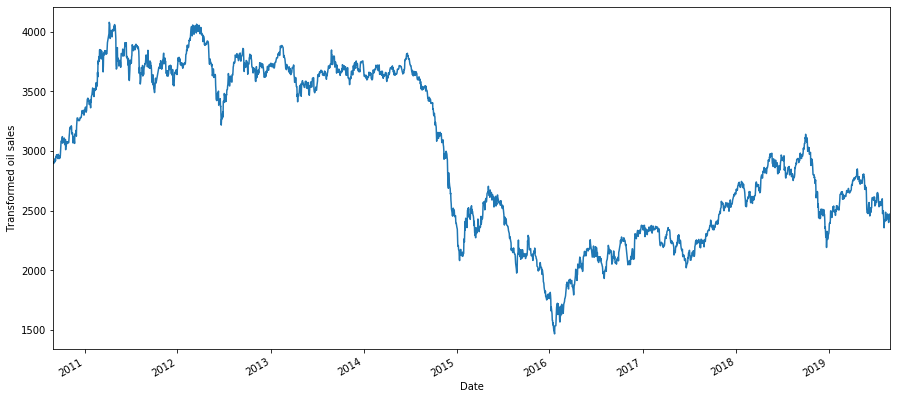

In [88]:
data['sales_box'], lmbda = stats.boxcox(data.Value)
plt.figure(figsize(15,7))
data.sales_box.plot()
plt.ylabel(u'Transformed oil sales')
print("Оптимальный параметр преобразования Кокса- Бокса: %f" % lmbda)
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data.sales_box)[1])

 ритерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

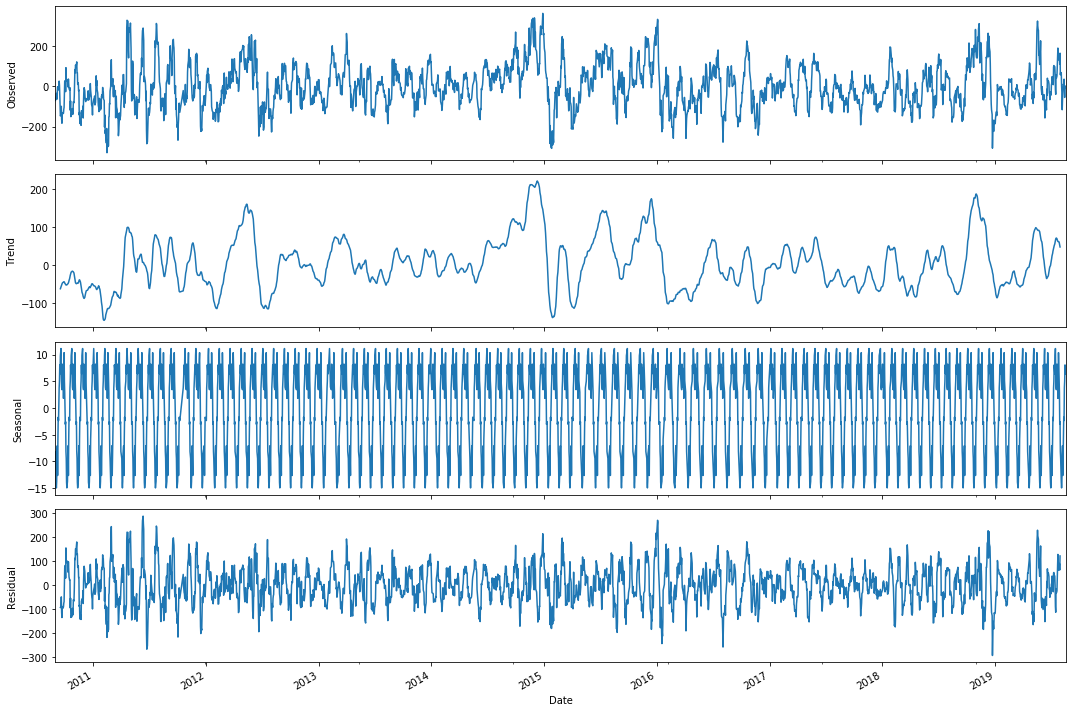

In [103]:
data['sales_box_diff'] = data.sales_box - data.sales_box.shift(12)
plt.figure(figsize(15,10))
#data.sales_box_diff[12:]
sm.tsa.seasonal_decompose(data.sales_box_diff[12:],freq=30).plot()
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data.sales_box_diff[12:])[1])

 Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

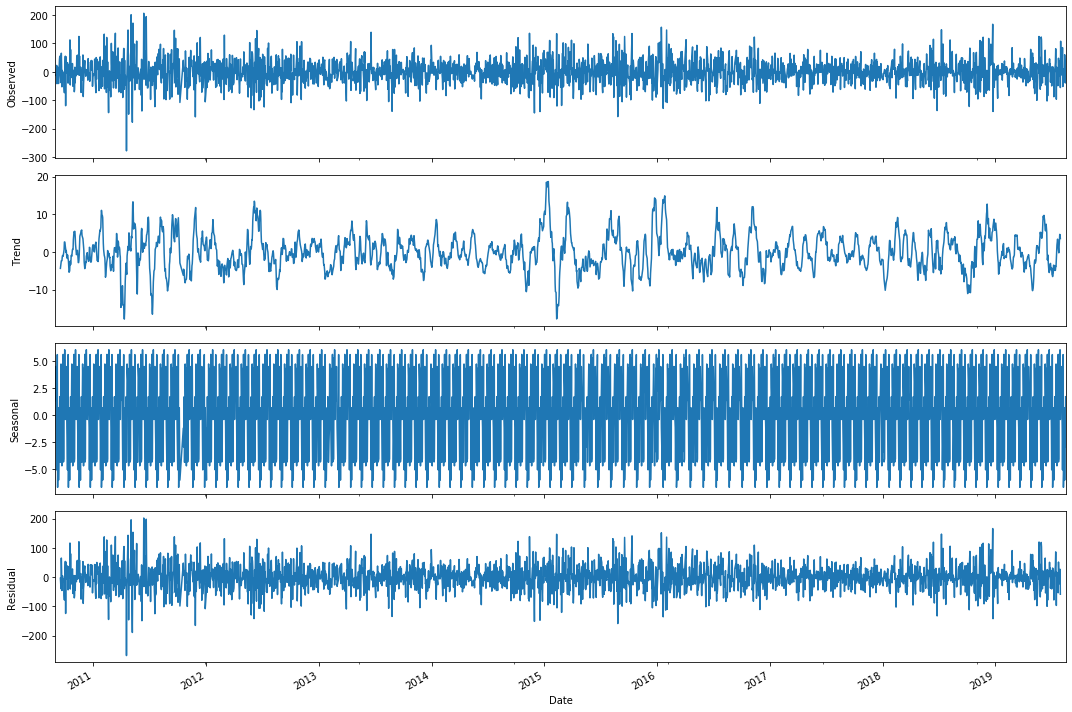

In [105]:
data['sales_box_diff2'] = data.sales_box_diff - data.sales_box_diff.shift(1)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(data.sales_box_diff2[13:],freq=30).plot()   
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data.sales_box_diff2[13:])[1])

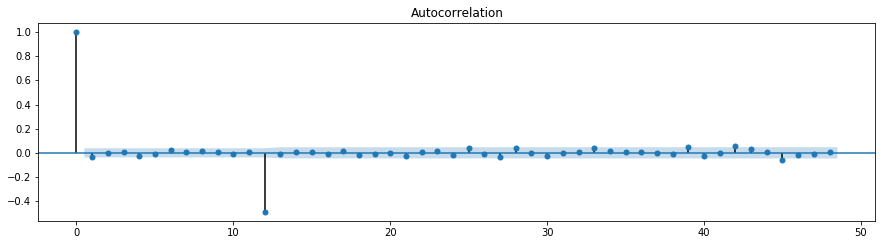

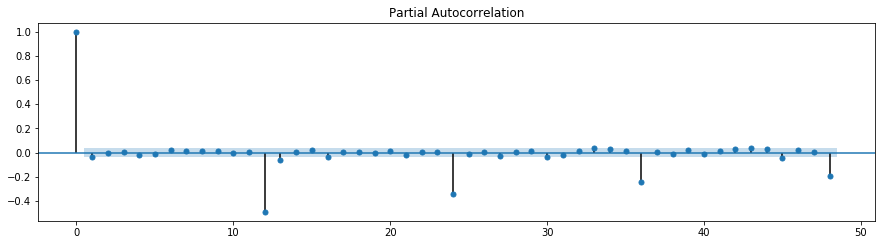

In [106]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data.sales_box_diff2[13:].values.squeeze(), lags=4*12, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data.sales_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
pylab.show()